In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

## Starting concentrations for runs:

In [13]:
runs = {1: {'a': 0.0824, 'b': 0.0601},
  2: {'a': 0.0865, 'b': 0.0436},
  3: {'a': 0.0548, 'b': 0.0366}}

### Run conductivity-concentration calibration notebook

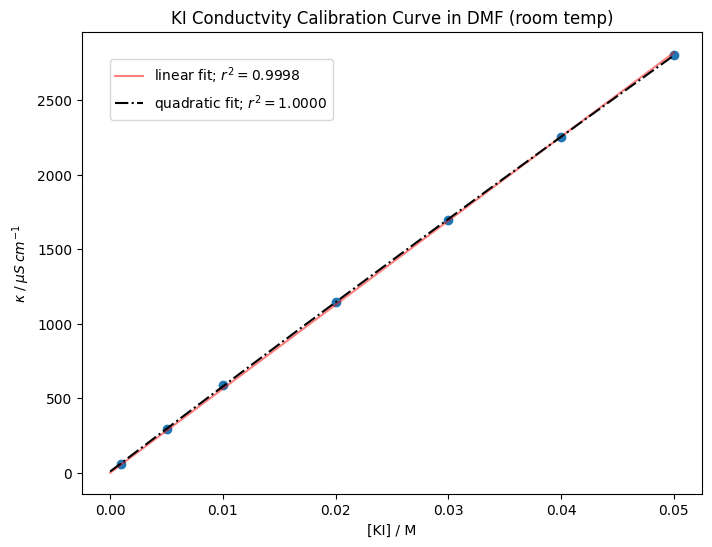

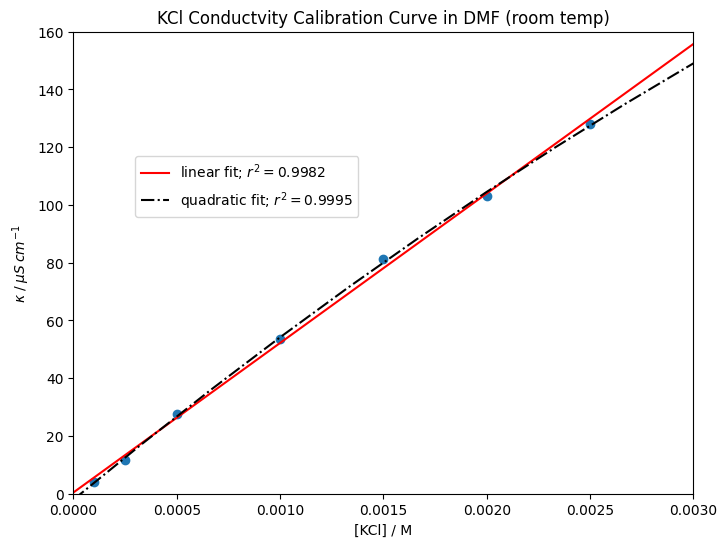

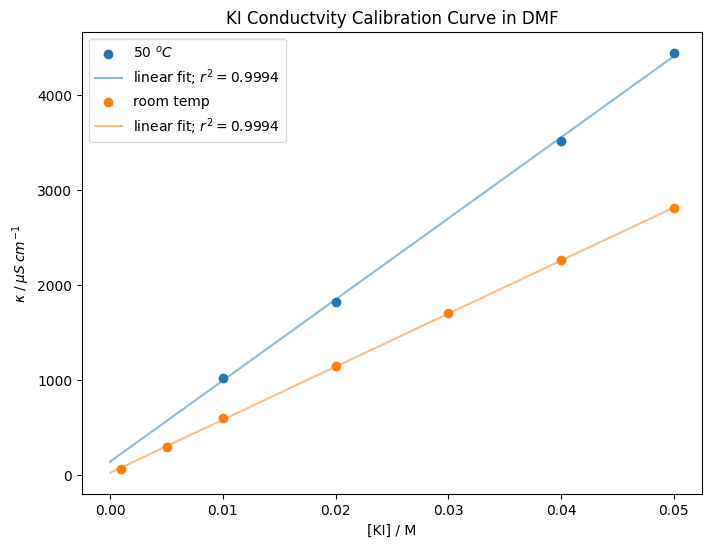

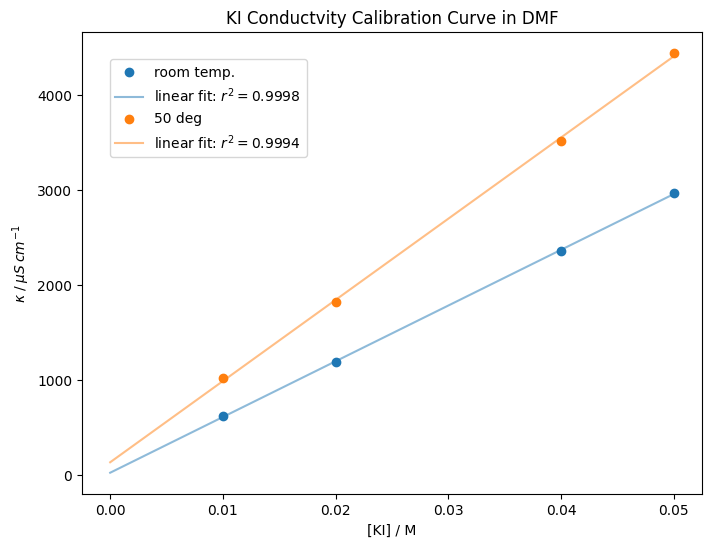

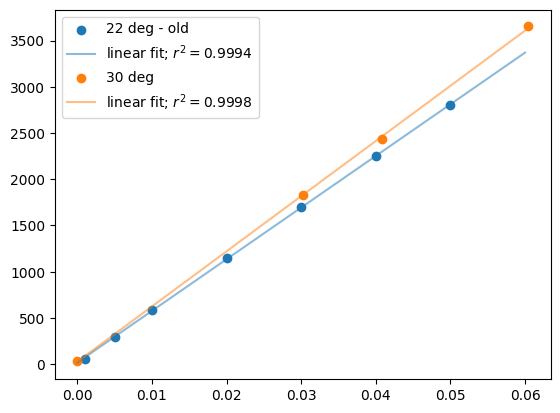

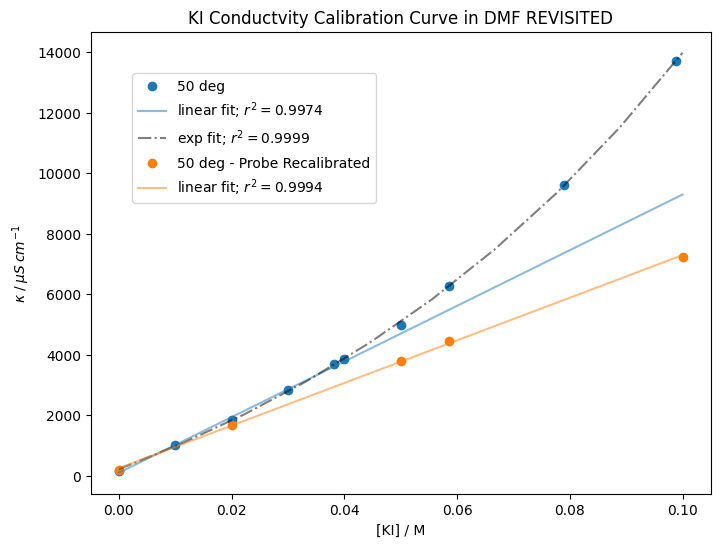

In [14]:
%run dmf_cal.ipynb

In [15]:
# integrated second order irreversible expression
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

## Chose subsitutent and run for plotting:

In [22]:
while True:
    run = input('Enter which run you wish to get the data for: ')

    try:
        with open(f'dmf_50_{run}.csv') as f:
            reader = csv.reader(f)
            data = np.array(list(reader)).astype(float)
        break
    except:
        print('Invalid run')

a = runs[int(run)]['a']
b = runs[int(run)]['b']

Enter which run you wish to get the data for:  3


## Plot Conductivity

[]

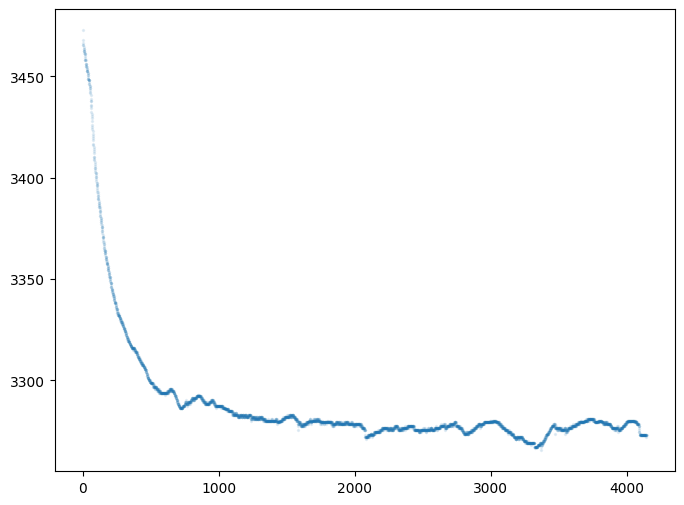

In [23]:
plt.figure(figsize=(8,6))

x = data[:,0]
y = data[:,1]

plt.scatter(x,y,s=2,alpha=0.1,marker='o')
plt.plot()

## Plot Concentration

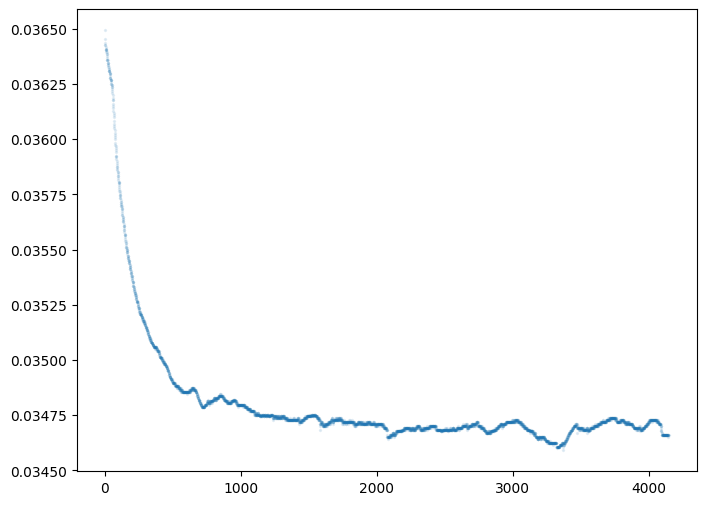

In [24]:
y_c = np.array(inv_exp(y,*popt_exp))
plt.figure(figsize=(8,6))

plt.scatter(x,y_c,s=2,alpha=0.1,marker='o')

# Irreversible second order equation does not fit well.
"""
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:500] , y_c[:500], p0=[0.0005])
k2 = popt[0]
plt.plot(x,c_second(x,a,b,k2),'r-.')
"""

plt.show()